# Purpose:
- check what kind of data Hannah has been using - is this count? rpkm? tpm?
- From exon + intron counts?
# Conclusion
- previous data was exon cpm
    - Some of the samples are removed (low quality, ALM cluster, Batch grouping, etc..)
- Summed exon count similar to total reads x percent reads unique x percent exon reads
    - But about 2% are vastly different - asked Jeff Goldy
- Created exon TPM (matching to the previous data samples)

In [2]:
from pathlib import Path
import numpy as np
import pandas as pd

In [3]:
tasic2018_dir = Path(r'\\allen\programs\mindscope\workgroups\learning\jinho\gene_panel_selection\data\mouse_VISp_gene_expression_matrices_2018-06-14')
mm_visp_dir = Path(r'\\allen\programs\mindscope\workgroups\learning\jinho\gene_panel_selection\data\Mm_VISp_14236_20180912')


In [4]:
exon_fn = tasic2018_dir / 'mouse_VISp_2018-06-14_exon-matrix.csv'
intron_fn = tasic2018_dir / 'mouse_VISp_2018-06-14_intron-matrix.csv'
gene_info_fn = tasic2018_dir / 'mouse_VISp_2018-06-14_genes-rows.csv'
sample_info_fn = tasic2018_dir / 'mouse_VISp_2018-06-14_samples-columns.csv'

In [5]:
# Takes about 5 min
exon_df = pd.read_csv(exon_fn, index_col=0)
intron_df = pd.read_csv(intron_fn, index_col=0)

In [6]:
# Try saving to feather
# Takes about 75 seconds
exon_df.to_feather(tasic2018_dir / 'exon_count.feather')
intron_df.to_feather(tasic2018_dir / 'intron_count.feather')

In [22]:
# test reading from feather
exon_df = pd.read_feather(tasic2018_dir / 'exon_count.feather')
intron_df = pd.read_feather(tasic2018_dir / 'intron_count.feather')
# Takes only 18 seconds. Use feather files from now on

In [18]:
gene_info_df = pd.read_csv(gene_info_fn, index_col=0)
sample_info_df = pd.read_csv(sample_info_fn, index_col=0)

In [19]:
gene_info_df

,gene_id,chromosome,gene_entrez_id,gene_name
gene_symbol,,,,
0610005C13Rik,500717483,7,71661,RIKEN cDNA 0610005C13 gene
0610006L08Rik,500717917,7,76253,RIKEN cDNA 0610006L08 gene
0610007P14Rik,500730104,12,58520,RIKEN cDNA 0610007P14 gene
0610009B22Rik,500726890,11,66050,RIKEN cDNA 0610009B22 gene
0610009E02Rik,500702775,2,100125929,RIKEN cDNA 0610009E02 gene
...,...,...,...,...
n-R5s142,500721654,8,100861496,nuclear encoded rRNA 5S 142
n-R5s143,500721655,8,100861497,nuclear encoded rRNA 5S 143
n-R5s144,500721656,8,100861498,nuclear encoded rRNA 5S 144


In [10]:
assert np.all(exon_df.index.values == intron_df.index.values)
assert np.all(exon_df.columns == intron_df.columns)
assert set(exon_df.index.values) == set(gene_info_df.gene_entrez_id.values)
assert set(exon_df.columns) == set(sample_info_df.index.values)

# Match gene and sample ids to those in data_t.feather

In [29]:
data = pd.read_feather(mm_visp_dir / 'data_t.feather')

In [31]:
data.set_index('gene', inplace=True)
data.head()

,LS-14690_S02_E1-50,LS-14690_S03_E1-50,LS-14690_S05_E1-50,LS-14690_S06_E1-50,LS-14690_S07_E1-50,LS-14690_S08_E1-50,LS-14690_S09_E1-50,LS-14690_S10_E1-50,LS-14690_S11_E1-50,LS-14690_S12_E1-50,...,SQ-80004_S37_E1-50,SQ-80004_S38_E1-50,SQ-80004_S39_E1-50,SQ-80004_S40_E1-50,SQ-80004_S41_E1-50,SQ-80004_S42_E1-50,SQ-80004_S43_E1-50,SQ-80004_S44_E1-50,SQ-80004_S47_E1-50,SQ-80004_S48_E1-50
gene,,,,,,,,,,,,,,,,,,,,,
0610005C13Rik,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
0610006L08Rik,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
0610007P14Rik,43.299797,11.167310,31.402268,145.991690,154.261257,0.000000,0.000000,83.984133,65.468468,11.226644,...,205.562609,182.700625,0.00000,63.124800,103.694716,0.000000,340.619657,99.623263,0.0,132.725762
0610009B22Rik,126.692000,54.905939,19.626418,16.753145,102.840838,47.063575,60.956081,113.517016,20.144144,81.393170,...,9.042343,0.000000,77.88796,75.843976,71.851457,0.439562,0.000000,24.771190,0.0,145.958240
0610009E02Rik,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.602823,0.000000,0.00000,6.124048,4.898963,0.000000,0.000000,0.000000,0.0,4.009842


In [20]:
gene_info_df = gene_info_df.reset_index()
gene_info_df.set_index('gene_entrez_id', inplace=True, drop=False)
gene_info_df.head()

,gene_symbol,gene_id,chromosome,gene_entrez_id,gene_name
gene_entrez_id,,,,,
71661,0610005C13Rik,500717483,7,71661,RIKEN cDNA 0610005C13 gene
76253,0610006L08Rik,500717917,7,76253,RIKEN cDNA 0610006L08 gene
58520,0610007P14Rik,500730104,12,58520,RIKEN cDNA 0610007P14 gene
66050,0610009B22Rik,500726890,11,66050,RIKEN cDNA 0610009B22 gene
100125929,0610009E02Rik,500702775,2,100125929,RIKEN cDNA 0610009E02 gene


In [23]:
exon_df['gene'] = gene_info_df.loc[exon_df.index, 'gene_symbol'].values
exon_df.set_index('gene', inplace=True)
exon_df.head()

,F1S4_160108_001_A01,F1S4_160108_001_B01,F1S4_160108_001_C01,F1S4_160108_001_D01,F1S4_160108_001_E01,F1S4_160108_001_F01,F1S4_160108_001_G01,F1S4_160108_001_H01,F1S4_160108_002_A01,F1S4_160108_002_B01,...,FYS4_171004_103_G01,FYS4_171004_103_H01,FYS4_171004_104_A01,FYS4_171004_104_B01,FYS4_171004_104_C01,FYS4_171004_104_D01,FYS4_171004_104_E01,FYS4_171004_104_F01,FYS4_171004_104_G01,FYS4_171004_104_H01
gene,,,,,,,,,,,,,,,,,,,,,
0610005C13Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610006L08Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610007P14Rik,79,121,89,115,390,61,72,161,118,121,...,263,45,88,81,187,99,49,123,112,37
0610009B22Rik,140,175,68,0,177,110,149,60,61,114,...,136,82,74,104,51,160,165,245,179,91
0610009E02Rik,0,1,0,0,0,0,0,0,0,26,...,0,0,0,0,0,0,0,0,25,0


In [26]:
exon_df = exon_df.rename(columns = sample_info_df['seq_name'])

In [32]:
exon_cpm = exon_df.div(exon_df.sum(axis=0), axis=1) * 1e6
exon_cpm_matched = exon_cpm.loc[:, data.columns]
exon_cpm_matched.head()

,LS-14690_S02_E1-50,LS-14690_S03_E1-50,LS-14690_S05_E1-50,LS-14690_S06_E1-50,LS-14690_S07_E1-50,LS-14690_S08_E1-50,LS-14690_S09_E1-50,LS-14690_S10_E1-50,LS-14690_S11_E1-50,LS-14690_S12_E1-50,...,SQ-80004_S37_E1-50,SQ-80004_S38_E1-50,SQ-80004_S39_E1-50,SQ-80004_S40_E1-50,SQ-80004_S41_E1-50,SQ-80004_S42_E1-50,SQ-80004_S43_E1-50,SQ-80004_S44_E1-50,SQ-80004_S47_E1-50,SQ-80004_S48_E1-50
gene,,,,,,,,,,,,,,,,,,,,,
0610005C13Rik,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
0610006L08Rik,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
0610007P14Rik,43.299797,11.167310,31.402268,145.991690,154.261257,0.000000,0.000000,83.984133,65.468468,11.226644,...,205.562609,182.700625,0.00000,63.124800,103.694716,0.000000,340.619657,99.623263,0.0,132.725762
0610009B22Rik,126.692000,54.905939,19.626418,16.753145,102.840838,47.063575,60.956081,113.517016,20.144144,81.393170,...,9.042343,0.000000,77.88796,75.843976,71.851457,0.439562,0.000000,24.771190,0.0,145.958240
0610009E02Rik,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.602823,0.000000,0.00000,6.124048,4.898963,0.000000,0.000000,0.000000,0.0,4.009842


In [33]:
exon_cpm_matched.equals(data)

False

In [36]:
exon_cpm_matched.shape == data.shape

True

In [37]:
np.max(np.abs(exon_cpm_matched.values - data.values))

5.820766091346741e-11

In [198]:
# save exon cpm
exon_cpm_matched.to_feather(tasic2018_dir / 'exon_cpm.feather')

## data_t.feather was exon cpm

# Relationship between sample info and exon counts

In [40]:
sample_info_df = sample_info_df.reset_index()
sample_info_df.set_index('seq_name', inplace=True, drop=True)
sample_info_df.head()

,sample_name,sample_id,sample_type,organism,donor,sex,age_days,eye_condition,genotype,driver_lines,...,genes_detected_cpm_criterion,genes_detected_fpkm_criterion,tdt_cpm,gfp_cpm,class,subclass,cluster,confusion_score,cluster_correlation,core_intermediate_call
seq_name,,,,,,,,,,,,,,,,,,,,,
LS-15006_S09_E1-50,F1S4_160108_001_A01,527128530,Cells,Mus musculus,225675,M,53,Normal,Slc32a1-IRES-Cre/wt;Ai14(RCL-tdT)/wt,Slc32a1-IRES-Cre,...,10445,9222,248.86,248.86,GABAergic,Vip,Vip Arhgap36 Hmcn1,0.4385,0.837229,Intermediate
LS-15006_S10_E1-50,F1S4_160108_001_B01,527128536,Cells,Mus musculus,225675,M,53,Normal,Slc32a1-IRES-Cre/wt;Ai14(RCL-tdT)/wt,Slc32a1-IRES-Cre,...,11600,10370,289.61,289.61,GABAergic,Lamp5,Lamp5 Lsp1,0.1025,0.878743,Core
LS-15006_S11_E1-50,F1S4_160108_001_C01,527128542,Cells,Mus musculus,225675,M,53,Normal,Slc32a1-IRES-Cre/wt;Ai14(RCL-tdT)/wt,Slc32a1-IRES-Cre,...,11848,10734,281.06,281.06,GABAergic,Lamp5,Lamp5 Lsp1,0.0195,0.887084,Core
LS-15006_S12_E1-50,F1S4_160108_001_D01,527128548,Cells,Mus musculus,225675,M,53,Normal,Slc32a1-IRES-Cre/wt;Ai14(RCL-tdT)/wt,Slc32a1-IRES-Cre,...,9494,8561,390.02,390.02,GABAergic,Vip,Vip Crispld2 Htr2c,0.2734,0.843552,Core
LS-15006_S13_E1-50,F1S4_160108_001_E01,527128554,Cells,Mus musculus,225675,M,53,Normal,Slc32a1-IRES-Cre/wt;Ai14(RCL-tdT)/wt,Slc32a1-IRES-Cre,...,10012,8791,253.92,253.92,GABAergic,Lamp5,Lamp5 Plch2 Dock5,0.7532,0.854994,Core


In [41]:
sample_info_df.columns

Index(['sample_name', 'sample_id', 'sample_type', 'organism', 'donor', 'sex',
       'age_days', 'eye_condition', 'genotype', 'driver_lines',
       'reporter_lines', 'brain_hemisphere', 'brain_region', 'brain_subregion',
       'injection_label_direction', 'injection_primary', 'injection_secondary',
       'injection_tract', 'injection_material',
       'injection_exclusion_criterion', 'facs_date', 'facs_container',
       'facs_sort_criteria', 'rna_amplification_set', 'library_prep_set',
       'library_prep_avg_size_bp', 'seq_tube', 'seq_batch', 'total_reads',
       'percent_exon_reads', 'percent_intron_reads',
       'percent_intergenic_reads', 'percent_rrna_reads',
       'percent_mt_exon_reads', 'percent_reads_unique', 'percent_synth_reads',
       'percent_ecoli_reads', 'percent_aligned_reads_total', 'complexity_cg',
       'genes_detected_cpm_criterion', 'genes_detected_fpkm_criterion',
       'tdt_cpm', 'gfp_cpm', 'class', 'subclass', 'cluster', 'confusion_score',
       'clu

In [47]:
sample_info_df['percent_other'] = sample_info_df['percent_rrna_reads'] + \
    sample_info_df['percent_mt_exon_reads'] +\
    sample_info_df['percent_synth_reads'] +\
    sample_info_df['percent_ecoli_reads']

In [50]:
sample_info_df['exon_reads'] = sample_info_df['total_reads'] * sample_info_df['percent_reads_unique'] / 100 \
    * sample_info_df['percent_exon_reads'] / 100 
sample_info_df['exon_reads'] = sample_info_df['exon_reads'].astype(int)

In [51]:
exon_counts_sum = exon_df.sum(axis=0).to_frame()
exon_counts_sum.rename(columns={0: 'exon_counts_sum'}, inplace=True)
exon_count_comp_df = exon_counts_sum.merge(sample_info_df[['exon_reads']], left_index=True, right_index=True)
exon_count_comp_df['sum_to_reads_ratio'] = exon_count_comp_df['exon_counts_sum'] / exon_count_comp_df['exon_reads']
exon_count_comp_df

,exon_counts_sum,exon_reads,sum_to_reads_ratio
LS-15006_S09_E1-50,1730719,1780008,0.972310
LS-15006_S10_E1-50,1909620,1952438,0.978069
LS-15006_S11_E1-50,1984957,2019379,0.982954
LS-15006_S12_E1-50,2291553,2321815,0.986966
LS-15006_S13_E1-50,1757463,1790311,0.981652
...,...,...,...
SM-GE63I_S092_E1-50,998736,1012008,0.986885
SM-GE63I_S093_E1-50,1109888,1121393,0.989740
SM-GE63I_S094_E1-50,1002767,1022317,0.980877
SM-GE63I_S095_E1-50,1025818,1042322,0.984166


<Axes: xlabel='sum_to_reads_ratio', ylabel='Count'>

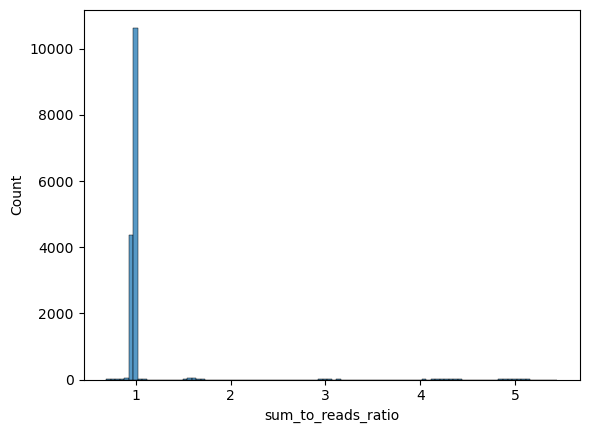

In [53]:
import seaborn as sns
sns.histplot(exon_count_comp_df['sum_to_reads_ratio'], bins=100)

In [54]:
exon_count_comp_df_matched = exon_count_comp_df.loc[data.columns]

<Axes: xlabel='sum_to_reads_ratio', ylabel='Count'>

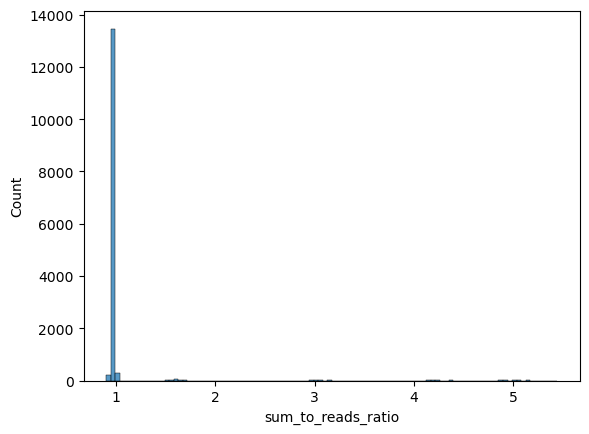

In [55]:
sns.histplot(exon_count_comp_df_matched['sum_to_reads_ratio'], bins=100)

In [93]:
len(exon_count_comp_df_matched)

14236

In [56]:
exon_count_comp_df_matched[np.abs(exon_count_comp_df_matched['sum_to_reads_ratio'] - 1) > 0.2]

,exon_counts_sum,exon_reads,sum_to_reads_ratio
LS-15356_S01_E3-50,4769416,1579520,3.019535
LS-15356_S02_E3-50,4948895,1567775,3.156636
LS-15356_S03_E3-50,4878813,1559022,3.129406
LS-15356_S04_E3-50,3623493,1143088,3.169916
LS-15356_S05_E3-50,4823274,1531887,3.148583
...,...,...,...
LS-15509_S92_E1-50_and_LS-15509_S92_E2-50,2328073,1484298,1.568467
LS-15509_S93_E1-50_and_LS-15509_S93_E2-50,2210261,1412487,1.564801
LS-15509_S94_E1-50_and_LS-15509_S94_E2-50,2495498,1543345,1.616941
LS-15509_S95_E1-50_and_LS-15509_S95_E2-50,2546451,1625392,1.566669


In [94]:
277/14236

0.019457712840685586

In [57]:
mismatched_samples = exon_count_comp_df_matched[np.abs(exon_count_comp_df_matched['sum_to_reads_ratio'] - 1) > 0.2].index.values


In [61]:
sample_info_df.loc[mismatched_samples][['total_reads', 'percent_exon_reads', 'percent_reads_unique']]

,total_reads,percent_exon_reads,percent_reads_unique
seq_name,,,
LS-15356_S01_E3-50,6491947,90.617655,26.849588
LS-15356_S02_E3-50,6179476,95.374526,26.601123
LS-15356_S03_E3-50,6876259,84.687067,26.772130
LS-15356_S04_E3-50,5804134,77.769818,25.323933
LS-15356_S05_E3-50,6726174,85.641911,26.593320
...,...,...,...
LS-15509_S92_E1-50_and_LS-15509_S92_E2-50,3312044,82.555168,54.285148
LS-15509_S93_E1-50_and_LS-15509_S93_E2-50,2926421,87.203644,55.349452
LS-15509_S94_E1-50_and_LS-15509_S94_E2-50,3457150,84.406916,52.889172


In [59]:
sample_info_df.loc[mismatched_samples].driver_lines.unique()

array(['Ctgf-T2A-dgCre', 'Pvalb-IRES-Cre', 'Snap25-IRES2-Cre',
       'Gad2-IRES-Cre', 'Chat-IRES-Cre-neo', 'Slc17a7-IRES2-Cre',
       'Nr5a1-Cre', 'Nos1-CreERT2', 'Nos1-CreERT2|Sst-IRES-FlpO'],
      dtype=object)

<Axes: xlabel='percent_reads_unique', ylabel='Count'>

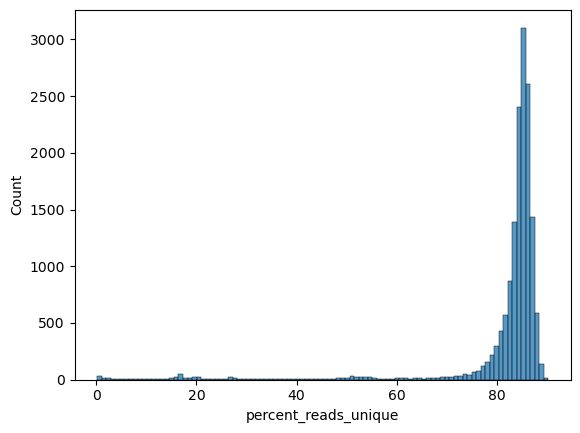

In [62]:
sns.histplot(sample_info_df['percent_reads_unique'], bins=100)

In [ ]:
percent_aligned_reads_total

<Axes: xlabel='percent_reads_unique', ylabel='Count'>

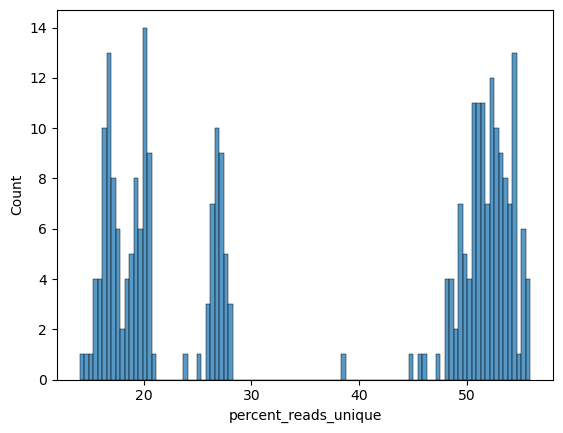

In [63]:
sns.histplot(sample_info_df.loc[mismatched_samples, 'percent_reads_unique'], bins=100)

<Axes: xlabel='percent_aligned_reads_total', ylabel='Count'>

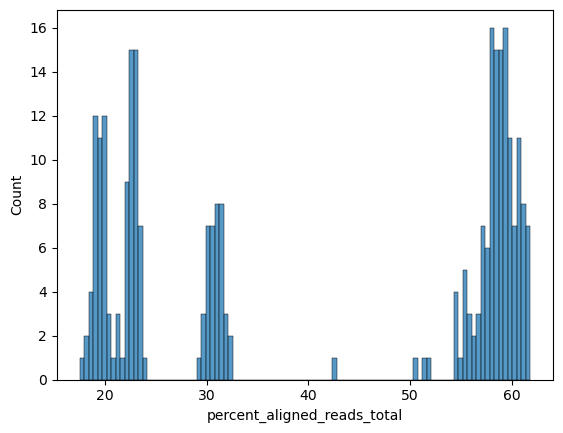

In [64]:
sns.histplot(sample_info_df.loc[mismatched_samples, 'percent_aligned_reads_total'], bins=100)

In [96]:
sample_info_df.columns

Index(['sample_name', 'sample_id', 'sample_type', 'organism', 'donor', 'sex',
       'age_days', 'eye_condition', 'genotype', 'driver_lines',
       'reporter_lines', 'brain_hemisphere', 'brain_region', 'brain_subregion',
       'injection_label_direction', 'injection_primary', 'injection_secondary',
       'injection_tract', 'injection_material',
       'injection_exclusion_criterion', 'facs_date', 'facs_container',
       'facs_sort_criteria', 'rna_amplification_set', 'library_prep_set',
       'library_prep_avg_size_bp', 'seq_tube', 'seq_batch', 'total_reads',
       'percent_exon_reads', 'percent_intron_reads',
       'percent_intergenic_reads', 'percent_rrna_reads',
       'percent_mt_exon_reads', 'percent_reads_unique', 'percent_synth_reads',
       'percent_ecoli_reads', 'percent_aligned_reads_total', 'complexity_cg',
       'genes_detected_cpm_criterion', 'genes_detected_fpkm_criterion',
       'tdt_cpm', 'gfp_cpm', 'class', 'subclass', 'cluster', 'confusion_score',
       'clu

In [98]:
sample_info_df.loc[mismatched_samples].core_intermediate_call.unique()

array(['Core', 'Intermediate'], dtype=object)

In [212]:
sample_info_df.loc[mismatched_samples, 'cluster'].unique()

array(['L6b VISp Mup5', 'L6b VISp Col8a1 Rprm', 'L6b VISp Col8a1 Rxfp1',
       'L6b VISp Crh', 'L6b P2ry12', 'Endo Ctla2a', 'Pvalb Reln Itm2a',
       'Pvalb Reln Tac1', 'Sst Tac1 Htr1d', 'Pvalb Gpr149 Islr',
       'Pvalb Tpbg', 'L5 PT VISp Chrna6', 'L5 IT VISp Col27a1',
       'L5 NP VISp Trhr Met', 'Vip Gpc3 Slc18a3', 'Vip Lect1 Oxtr',
       'Lamp5 Lsp1', 'L5 PT VISp Krt80', 'L5 IT VISp Batf3',
       'Vip Ptprt Pkp2', 'L6 IT VISp Col18a1', 'L6 IT VISp Penk Col27a1',
       'L5 NP VISp Trhr Cpne7', 'L5 PT VISp C1ql2 Cdh13', 'Sst Esm1',
       'Sst Chrna2 Glra3', 'Astro Aqp4', 'Vip Arhgap36 Hmcn1',
       'Vip Rspo4 Rxfp1 Chat', 'L2/3 IT VISp Agmat', 'L2/3 IT VISp Rrad',
       'L2/3 IT VISp Adamts2', 'L4 IT VISp Rspo1',
       'L5 IT VISp Hsd11b1 Endou', 'L6b Hsd17b2', 'VLMC Spp1 Col15a1',
       'VLMC Spp1 Hs3st6', 'Vip Igfbp6 Pltp', 'Sst Rxfp1 Prdm8',
       'Vip Igfbp4 Mab21l1', 'L6 IT VISp Col23a1 Adamts2',
       'Vip Lmo1 Fam159b', 'Sst Myh8 Fibin', 'L5 IT VISp Col6a1 Fezf2'

<Axes: xlabel='percent_reads_unique', ylabel='percent_aligned_reads_total'>

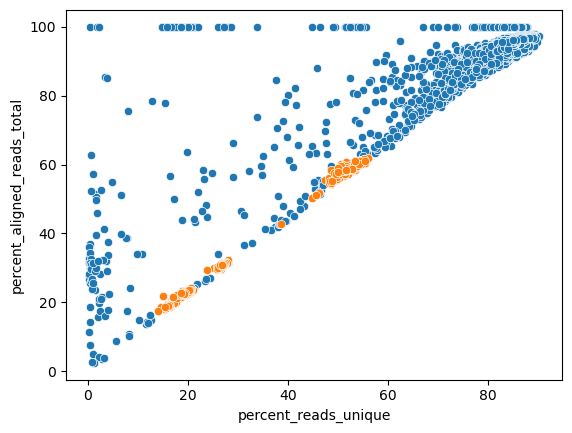

In [67]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
sns.scatterplot(data=sample_info_df, x='percent_reads_unique', y='percent_aligned_reads_total', ax=ax)
sns.scatterplot(data=sample_info_df.loc[mismatched_samples], x='percent_reads_unique', y='percent_aligned_reads_total', ax=ax)


## What if just use total * percent_exon_reads?

In [68]:
sample_info_df['exon_reads2'] = sample_info_df['total_reads'] * sample_info_df['percent_exon_reads'] / 100 
sample_info_df['exon_reads2'] = sample_info_df['exon_reads2'].astype(int)

In [69]:
exon_count_comp_df = exon_counts_sum.merge(sample_info_df[['exon_reads', 'exon_reads2']], left_index=True, right_index=True)
exon_count_comp_df['sum_to_reads_ratio'] = exon_count_comp_df['exon_counts_sum'] / exon_count_comp_df['exon_reads']
exon_count_comp_df['sum_to_reads_ratio2'] = exon_count_comp_df['exon_counts_sum'] / exon_count_comp_df['exon_reads2']
exon_count_comp_df

,exon_counts_sum,exon_reads,exon_reads2,sum_to_reads_ratio,sum_to_reads_ratio2
LS-15006_S09_E1-50,1730719,1780008,2124931,0.972310,0.814482
LS-15006_S10_E1-50,1909620,1952438,2316502,0.978069,0.824355
LS-15006_S11_E1-50,1984957,2019379,2395798,0.982954,0.828516
LS-15006_S12_E1-50,2291553,2321815,2764339,0.986966,0.828970
LS-15006_S13_E1-50,1757463,1790311,2212641,0.981652,0.794283
...,...,...,...,...,...
SM-GE63I_S092_E1-50,998736,1012008,1206759,0.986885,0.827618
SM-GE63I_S093_E1-50,1109888,1121393,1289461,0.989740,0.860738
SM-GE63I_S094_E1-50,1002767,1022317,1236753,0.980877,0.810806
SM-GE63I_S095_E1-50,1025818,1042322,1219648,0.984166,0.841077


<Axes: xlabel='sum_to_reads_ratio2', ylabel='Count'>

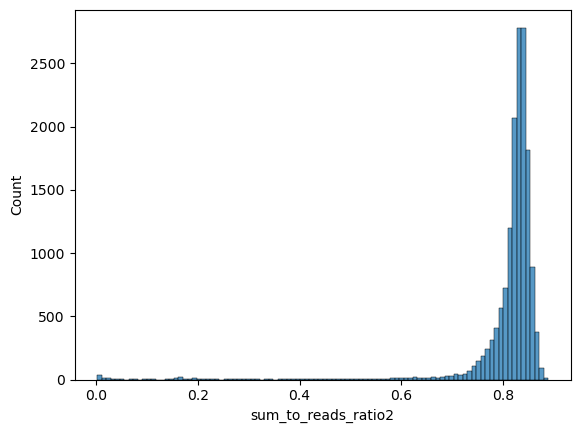

In [70]:
sns.histplot(exon_count_comp_df['sum_to_reads_ratio2'], bins=100)

In [182]:
sample_info_df['unique_reads_total'] = sample_info_df['total_reads'] * sample_info_df['percent_reads_unique'] / 100
sample_info_df['unique_reads_total'] = sample_info_df['unique_reads_total'].astype(int)

In [187]:
sample_info_df['unique_exon_intron_reads_total'] = sample_info_df['unique_reads_total'] * (sample_info_df['percent_exon_reads'] + sample_info_df['percent_intron_reads']) / 100
sample_info_df['unique_exon_intron_reads_total'] = sample_info_df['unique_exon_intron_reads_total'].astype(int)

In [149]:
percent_columns = [cn for cn in sample_info_df.columns if cn.startswith('percent')]
sample_info_df[percent_columns]

,percent_exon_reads,percent_intron_reads,percent_intergenic_reads,percent_rrna_reads,percent_mt_exon_reads,percent_reads_unique,percent_synth_reads,percent_ecoli_reads,percent_aligned_reads_total
sample_name,,,,,,,,,
F1S4_160108_001_A01,74.166722,20.923297,4.909982,0.135529,0.000105,83.767784,0.004890,0.019619,100.000000
F1S4_160108_001_B01,77.557410,17.378139,5.064451,0.117114,0.000402,84.283870,0.003901,0.014724,100.000000
F1S4_160108_001_C01,83.132259,12.612901,4.254840,0.115652,0.000312,84.288347,0.003321,0.012712,100.000000
F1S4_160108_001_D01,89.324527,7.624426,3.051048,0.257407,0.000226,83.991708,0.005803,0.018068,100.000000
F1S4_160108_001_E01,84.233051,11.341862,4.425087,0.160156,0.000381,80.912887,0.005922,0.030561,100.000000
...,...,...,...,...,...,...,...,...,...
FYS4_171004_104_D01,91.910078,4.910152,3.179770,0.093223,0.001219,83.861725,0.005445,0.003423,95.474410
FYS4_171004_104_E01,92.531510,4.652180,2.816310,0.181265,0.000359,86.966053,0.005001,0.001707,96.547636
FYS4_171004_104_F01,85.439862,10.780638,3.779500,0.122900,0.000484,82.661365,0.005963,0.003362,95.650816


In [156]:
sum_df = sample_info_df.percent_exon_reads + sample_info_df.percent_intron_reads + sample_info_df.percent_intergenic_reads
sum_df.unique()

array([100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100.])

In [158]:
all_sum_df = sample_info_df.percent_exon_reads + sample_info_df.percent_intron_reads + sample_info_df.percent_intergenic_reads + sample_info_df.percent_rrna_reads + sample_info_df.percent_mt_exon_reads + sample_info_df.percent_synth_reads + sample_info_df.percent_ecoli_reads
all_sum_df.head()

sample_name
F1S4_160108_001_A01    100.160143
F1S4_160108_001_B01    100.136141
F1S4_160108_001_C01    100.131997
F1S4_160108_001_D01    100.281504
F1S4_160108_001_E01    100.197020
dtype: float64

In [157]:
sample_info_df[['percent_aligned_reads_total']]

,percent_aligned_reads_total
sample_name,
F1S4_160108_001_A01,100.000000
F1S4_160108_001_B01,100.000000
F1S4_160108_001_C01,100.000000
F1S4_160108_001_D01,100.000000
F1S4_160108_001_E01,100.000000
...,...
FYS4_171004_104_D01,95.474410
FYS4_171004_104_E01,96.547636
FYS4_171004_104_F01,95.650816


In [145]:
sample_info_df.columns

Index(['sample_id', 'sample_type', 'organism', 'donor', 'sex', 'age_days',
       'eye_condition', 'genotype', 'driver_lines', 'reporter_lines',
       'brain_hemisphere', 'brain_region', 'brain_subregion',
       'injection_label_direction', 'injection_primary', 'injection_secondary',
       'injection_tract', 'injection_material',
       'injection_exclusion_criterion', 'facs_date', 'facs_container',
       'facs_sort_criteria', 'rna_amplification_set', 'library_prep_set',
       'library_prep_avg_size_bp', 'seq_name', 'seq_tube', 'seq_batch',
       'total_reads', 'percent_exon_reads', 'percent_intron_reads',
       'percent_intergenic_reads', 'percent_rrna_reads',
       'percent_mt_exon_reads', 'percent_reads_unique', 'percent_synth_reads',
       'percent_ecoli_reads', 'percent_aligned_reads_total', 'complexity_cg',
       'genes_detected_cpm_criterion', 'genes_detected_fpkm_criterion',
       'tdt_cpm', 'gfp_cpm', 'class', 'subclass', 'cluster', 'confusion_score',
       'cluste

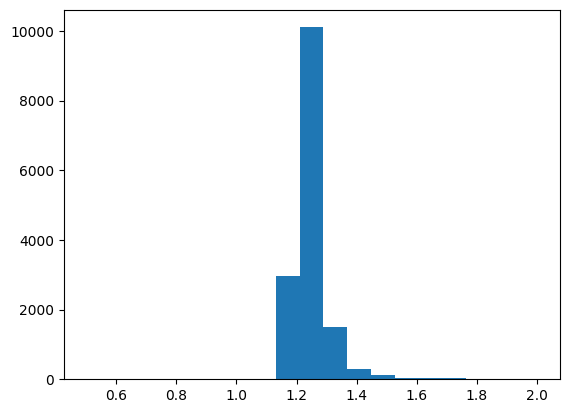

In [171]:
plt.hist(sum_and_total_reads['total_reads'] / sum_and_total_reads['sum'], bins=np.linspace(0.5,2.0,20));

In [93]:
# another data (transformed?)
another_data = pd.read_feather(mm_visp_dir / 'data.feather')
another_data_t = another_data.set_index('sample_id', drop=True).T
np.array_equal(another_data_t.values, data.values)
# This is just transformed data

True

In [102]:
# comparing samples
set(data.columns) == set(count_df.columns)
# These are not the same data

False

In [103]:
set(data.columns) - set(count_df.columns)

set()

In [105]:
data.columns

Index(['LS-14690_S02_E1-50', 'LS-14690_S03_E1-50', 'LS-14690_S05_E1-50',
       'LS-14690_S06_E1-50', 'LS-14690_S07_E1-50', 'LS-14690_S08_E1-50',
       'LS-14690_S09_E1-50', 'LS-14690_S10_E1-50', 'LS-14690_S11_E1-50',
       'LS-14690_S12_E1-50',
       ...
       'SQ-80004_S37_E1-50', 'SQ-80004_S38_E1-50', 'SQ-80004_S39_E1-50',
       'SQ-80004_S40_E1-50', 'SQ-80004_S41_E1-50', 'SQ-80004_S42_E1-50',
       'SQ-80004_S43_E1-50', 'SQ-80004_S44_E1-50', 'SQ-80004_S47_E1-50',
       'SQ-80004_S48_E1-50'],
      dtype='object', length=14236)

In [107]:
np.unique([sn.split('-')[0] for sn in list(data.columns)])

array(['LS', 'SM', 'SQ'], dtype='<U2')

In [111]:
len(np.unique(count_df.columns))

15413

In [112]:
len(np.unique(data.columns))

14236

In [108]:
len(set(count_df.columns) - set(data.columns))

1177

In [143]:
removed_samples = list(set(count_df.columns) - set(data.columns))
sample_info_df.set_index('seq_name').loc[removed_samples, 'cluster'].unique()

array(['Low Quality', 'Low Quality L4 Rspo1',
       'Batch Grouping VISp L5 PT Ctxn3', 'High Intronic VISp L5 Endou',
       'Low Quality VISp L6 CT Ptprt_2', 'Doublet Endo and Peri_1',
       'Low Quality VISp L5 PT Ctxn3 1',
       'Batch Grouping VISp L5 PT Chrna6', 'Doublet Endo Peri SMC',
       'Doublet VISp L5 NP and L6 CT', 'Low Quality Astro Aqp4',
       'L5 NP ALM Trhr Nefl', 'Low Quality VISp L5 PT Ctxn3 2',
       'Low Quality VISp L6 CT Ptprt_1', 'L5 IT ALM Npw',
       'Doublet SMC and Glutamatergic', 'Low Quality ALM L6 CT Cpa6',
       'Doublet Astro Aqp4 Ex', 'L5 IT ALM Cpa6 Gpr88',
       'Low Quality Meis2 Adamts19 ', 'L6 IT ALM Tgfb1',
       'L6 IT ALM Oprk1', 'L2/3 IT ALM Sla', 'L6 CT ALM Cpa6'],
      dtype=object)

In [142]:
sample_info_df.set_index('seq_name').loc[list(data.columns), 'cluster'].unique()

array(['Pvalb Tpbg', 'L4 IT VISp Rspo1', 'Vip Chat Htr1f',
       'L2/3 IT VISp Agmat', 'Lamp5 Lsp1', 'L5 NP VISp Trhr Cpne7',
       'Sst Hpse Sema3c', 'Vip Pygm C1ql1', 'L5 IT VISp Hsd11b1 Endou',
       'Vip Ptprt Pkp2', 'L5 NP VISp Trhr Met', 'Oligo Rassf10',
       'L5 IT VISp Batf3', 'Vip Igfbp4 Mab21l1',
       'L6 CT VISp Ctxn3 Brinp3', 'L6 IT VISp Penk Col27a1',
       'L6 IT VISp Col23a1 Adamts2', 'L6 IT VISp Col18a1',
       'L6 IT VISp Penk Fst', 'Oligo Synpr', 'Sst Chodl',
       'Lamp5 Ntn1 Npy2r', 'Vip Igfbp6 Car10', 'Vip Crispld2 Kcne4',
       'Vip Igfbp6 Pltp', 'Vip Gpc3 Slc18a3', 'Pvalb Reln Itm2a',
       'Vip Lmo1 Myl1', 'Vip Crispld2 Htr2c', 'Lamp5 Plch2 Dock5',
       'Vip Col15a1 Pde1a', 'Pvalb Gabrg1', 'L6 IT VISp Car3',
       'Oligo Serpinb1a', 'Vip Rspo4 Rxfp1 Chat', 'Lamp5 Fam19a1 Tmem182',
       'Lamp5 Fam19a1 Pax6', 'Sst Chrna2 Ptgdr', 'Pvalb Reln Tac1',
       'Vip Arhgap36 Hmcn1', 'Pvalb Calb1 Sst', 'Sst Rxfp1 Prdm8',
       'Pvalb Th Sst', 'Sst Nr2f2 

In [223]:
sample_info_df.columns

Index(['sample_name', 'sample_id', 'sample_type', 'organism', 'donor', 'sex',
       'age_days', 'eye_condition', 'genotype', 'driver_lines',
       'reporter_lines', 'brain_hemisphere', 'brain_region', 'brain_subregion',
       'injection_label_direction', 'injection_primary', 'injection_secondary',
       'injection_tract', 'injection_material',
       'injection_exclusion_criterion', 'facs_date', 'facs_container',
       'facs_sort_criteria', 'rna_amplification_set', 'library_prep_set',
       'library_prep_avg_size_bp', 'seq_tube', 'seq_batch', 'total_reads',
       'percent_exon_reads', 'percent_intron_reads',
       'percent_intergenic_reads', 'percent_rrna_reads',
       'percent_mt_exon_reads', 'percent_reads_unique', 'percent_synth_reads',
       'percent_ecoli_reads', 'percent_aligned_reads_total', 'complexity_cg',
       'genes_detected_cpm_criterion', 'genes_detected_fpkm_criterion',
       'tdt_cpm', 'gfp_cpm', 'class', 'subclass', 'cluster', 'confusion_score',
       'clu

# Solved
- data_t.feather is exon-specific cpm
- How can I transfer this to TPM? Do I really need TPM?

# Response to Jeff Goldy
- Are there samples in the datasets you are using that have percent_intergenic values >100%?

In [226]:
set(sample_info_df.cluster.unique()) - set(sample_info_df.loc[list(data.columns), 'cluster'].unique())

{'Batch Grouping VISp L5 PT Chrna6',
 'Batch Grouping VISp L5 PT Ctxn3',
 'Doublet Astro Aqp4 Ex',
 'Doublet Endo Peri SMC',
 'Doublet Endo and Peri_1',
 'Doublet SMC and Glutamatergic',
 'Doublet VISp L5 NP and L6 CT',
 'High Intronic VISp L5 Endou',
 'L2/3 IT ALM Sla',
 'L5 IT ALM Cpa6 Gpr88',
 'L5 IT ALM Npw',
 'L5 NP ALM Trhr Nefl',
 'L6 CT ALM Cpa6',
 'L6 IT ALM Oprk1',
 'L6 IT ALM Tgfb1',
 'Low Quality',
 'Low Quality ALM L6 CT Cpa6',
 'Low Quality Astro Aqp4',
 'Low Quality L4 Rspo1',
 'Low Quality Meis2 Adamts19 ',
 'Low Quality VISp L5 PT Ctxn3 1',
 'Low Quality VISp L5 PT Ctxn3 2',
 'Low Quality VISp L6 CT Ptprt_1',
 'Low Quality VISp L6 CT Ptprt_2'}

(array([1.4892e+04, 4.3600e+02, 1.2000e+01, 8.0000e+00, 9.0000e+00,
        9.0000e+00, 1.0000e+01, 1.9000e+01, 1.4000e+01, 4.0000e+00]),
 array([ 1.29935887,  7.17914058, 13.05892228, 18.93870398, 24.81848569,
        30.69826739, 36.57804909, 42.4578308 , 48.3376125 , 54.2173942 ,
        60.09717591]),
 <BarContainer object of 10 artists>)

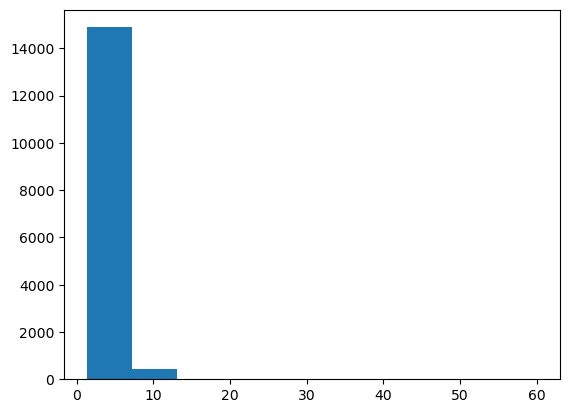

In [216]:
fig, ax = plt.subplots()
ax.hist(sample_info_df['percent_intergenic_reads'].values)


(array([  3.,  59., 113.,  70.,  21.,   6.,   3.,   1.,   0.,   1.]),
 array([1.79006418, 2.57330183, 3.35653947, 4.13977711, 4.92301475,
        5.7062524 , 6.48949004, 7.27272768, 8.05596533, 8.83920297,
        9.62244061]),
 <BarContainer object of 10 artists>)

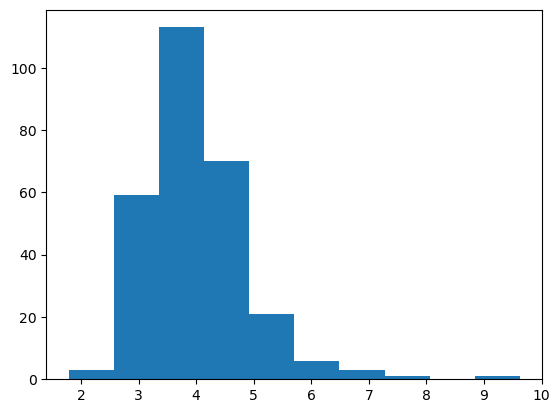

In [215]:
fig, ax = plt.subplots()
ax.hist(sample_info_df.loc[mismatched_samples]['percent_intergenic_reads'].values)


## Other files in the allen drive (copied)

In [94]:
desc = pd.read_feather(mm_visp_dir / 'desc.feather')

In [95]:
desc

,base,name,type
0,cluster,Final Cluster,cat
1,dendcluster,Final Cluster (Dendrogram),cat
2,lf_cluster,Louvain-First Clusters,cat
3,lrcluster,Previous Clusters,cat
4,bacluster,biorXiv Cluster,cat
5,subclass,Cell Subclass,cat
6,class,Cell Class,cat
7,genes,Genes Detected,num
8,confusion,Confusion Score,num
9,cl_cor,Cluster Correlation,num


In [143]:
gtf_fn = tasic2018_dir / 'rsem_GRCm38.p3.gtf'

# Define column names (GTF files have 9 columns)
col_names = ["seqname", "source", "feature", "start", "end", "score", "strand", "frame", "attribute"]

# Load the GTF file as a pandas DataFrame
gtf_df = pd.read_csv(gtf_fn, sep='\t', comment='#', header=None, names=col_names)

# roll out attribute to different columns
gtf_df['gene_id'] = gtf_df['attribute'].str.extract(r'gene_id "(.*?)";').astype(int)
gtf_df['gene_symbol'] = gtf_df['attribute'].str.extract(r'gene_symbol "(.*?)";')
gtf_df['transcript_id'] = gtf_df['attribute'].str.extract(r'transcript_id "(.*?)"')


# Filter for specific features (e.g., genes)
exon_gtf_df = gtf_df[gtf_df['feature'] == 'exon'].copy()
exon_gtf_df.head()


,seqname,source,feature,start,end,score,strand,frame,attribute,gene_id,gene_symbol,transcript_id
2,NC_000067.6,Gnomon,exon,3670552,3671742,.,-,.,"gene_id ""497097""; gene_symbol ""Xkr4""; transcri...",497097,Xkr4,XM_006495550.2
3,NC_000067.6,Gnomon,exon,3421702,3421901,.,-,.,"gene_id ""497097""; gene_symbol ""Xkr4""; transcri...",497097,Xkr4,XM_006495550.2
4,NC_000067.6,Gnomon,exon,3213439,3216968,.,-,.,"gene_id ""497097""; gene_symbol ""Xkr4""; transcri...",497097,Xkr4,XM_006495550.2
5,NC_000067.6,Gnomon,exon,3199731,3207317,.,-,.,"gene_id ""497097""; gene_symbol ""Xkr4""; transcri...",497097,Xkr4,XM_006495550.2
7,NC_000067.6,BestRefSeq,exon,3670552,3671498,.,-,.,"gene_id ""497097""; gene_symbol ""Xkr4""; transcri...",497097,Xkr4,NM_001011874.1


In [102]:
gtf_df.gene_symbol.unique()

array(['Xkr4', 'Gm18956', 'LOC105243853', ..., 'CYTB', 'TrnT', 'TrnP'],
      dtype=object)

In [103]:
gene_info_df.head()

,gene_symbol,gene_id,chromosome,gene_entrez_id,gene_name
gene_entrez_id,,,,,
71661,0610005C13Rik,500717483,7,71661,RIKEN cDNA 0610005C13 gene
76253,0610006L08Rik,500717917,7,76253,RIKEN cDNA 0610006L08 gene
58520,0610007P14Rik,500730104,12,58520,RIKEN cDNA 0610007P14 gene
66050,0610009B22Rik,500726890,11,66050,RIKEN cDNA 0610009B22 gene
100125929,0610009E02Rik,500702775,2,100125929,RIKEN cDNA 0610009E02 gene


In [144]:
exon_gtf_gene_ids = [int(gid) for gid in exon_gtf_df.gene_id.unique()]

In [145]:
set(gene_info_df.gene_entrez_id.values) - set(gtf_gene_ids)

set()

In [146]:
set(gtf_gene_ids) - set(gene_info_df.gene_entrez_id.values)

{195297, 102637480, 105246601}

In [147]:
set(gtf_df.gene_symbol.unique()) == set(data.index.values)

True

## gene symbols match, but gene ids don't

In [119]:
len(gtf_gene_ids)

45771

In [117]:
len(gene_info_df.gene_entrez_id.values)

45768

In [134]:
gi = 1000
gtf_gene_symbol = gtf_df[gtf_df.gene_id == str(gene_info_df.iloc[gi].gene_entrez_id)].gene_symbol.unique()[0]
gene_info_df.iloc[gi].gene_symbol == gtf_gene_symbol


True

In [150]:
for gtf_gene_id in list(set(gtf_gene_ids) - set(gene_info_df.gene_entrez_id.values)):
    gtf_gene_symbol = exon_gtf_df[exon_gtf_df.gene_id == gtf_gene_id].gene_symbol.unique()[0]
    gene_info_gene_id = gene_info_df[gene_info_df.gene_symbol == gtf_gene_symbol].gene_entrez_id.values[0]
    print(gtf_gene_symbol, exon_gtf_df[exon_gtf_df.gene_symbol == gtf_gene_symbol].gene_id.unique())

Zar1 [   317755 102637480]
Trav16n [100126459    195297]
Luzp4 [105246601    434865]


## Use gene symbols to match genes between scRNAseq and gtf info

In [154]:
def calculate_exon_length(exon_length_df):
    # Sort by start position
    exon_length_df = exon_length_df.sort_values(by='start')
    
    # Initialize variables to track exon length and the current covered range
    total_length = 0
    current_start = None
    current_end = None
    
    for _, row in exon_length_df.iterrows():
        start, end = row['start'], row['end']
        # If this exon does not overlap with the previous one, add its length
        if current_end is None or start > current_end:
            total_length += end - start + 1
            current_start, current_end = start, end
        else:
            # If it overlaps, extend the current exon range if needed
            if end > current_end:
                total_length += end - current_end
                current_end = end

    return total_length

In [155]:
gene_symbol = data.index.values[0]
exon_length_df = exon_gtf_df.query('gene_symbol == @gene_symbol').sort_values('start')[['start', 'end']].drop_duplicates()
calculate_exon_length(exon_length_df)

1122

In [156]:
# Takes about an hour
gene_info_df['exon_length'] = gene_info_df.gene_symbol.apply(lambda gs: calculate_exon_length(exon_gtf_df.query('gene_symbol == @gs').sort_values('start')[['start', 'end']].drop_duplicates()))

In [157]:
# save it to feather
gene_info_df.to_feather(tasic2018_dir / 'gene_info.feather')


In [166]:
np.logspace(0.1,7,100)

array([1.25892541e+00, 1.47807670e+00, 1.73537741e+00, 2.03746853e+00,
       2.39214708e+00, 2.80856739e+00, 3.29747733e+00, 3.87149576e+00,
       4.54543820e+00, 5.33669923e+00, 6.26570144e+00, 7.35642254e+00,
       8.63701425e+00, 1.01405289e+01, 1.19057724e+01, 1.39783061e+01,
       1.64116224e+01, 1.92685256e+01, 2.26227530e+01, 2.65608778e+01,
       3.11845437e+01, 3.66130884e+01, 4.29866235e+01, 5.04696512e+01,
       5.92553098e+01, 6.95703587e+01, 8.16810312e+01, 9.58999061e+01,
       1.12593975e+02, 1.32194115e+02, 1.55206209e+02, 1.82224203e+02,
       2.13945438e+02, 2.51188643e+02, 2.94915073e+02, 3.46253315e+02,
       4.06528417e+02, 4.77296092e+02, 5.60382867e+02, 6.57933225e+02,
       7.72464959e+02, 9.06934155e+02, 1.06481149e+03, 1.25017180e+03,
       1.46779927e+03, 1.72331091e+03, 2.02330151e+03, 2.37551390e+03,
       2.78903873e+03, 3.27454916e+03, 3.84457630e+03, 4.51383266e+03,
       5.29959186e+03, 6.22213449e+03, 7.30527154e+03, 8.57695899e+03,
      

(0.0, 20000.0)

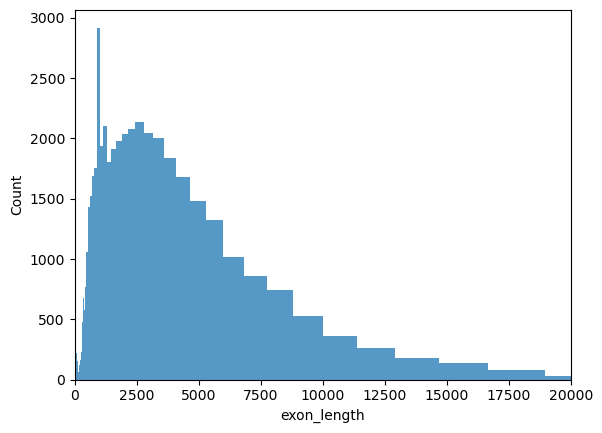

In [176]:
fig, ax = plt.subplots()
sns.histplot(gene_info_df.exon_length, bins=np.logspace(1,6.5,100), ax=ax)
ax.set_xlim(0, 20000)

# Convert exon cpm to TPM

In [179]:
exon_matched = exon_df.loc[:, data.columns]

In [182]:
exon_matched.index.values

array(['0610005C13Rik', '0610006L08Rik', '0610007P14Rik', ..., 'n-R5s144',
       'n-R5s146', 'n-R5s149'], dtype=object)

In [185]:
gene_info_df.set_index('gene_symbol', inplace=True)
np.all(gene_info_df.index.values == exon_matched.index.values)

True

In [186]:
exon_count_per_kb = exon_matched.div(gene_info_df.exon_length, axis=0) * 1e3

In [191]:
gene_info_df.head()

,gene_id,chromosome,gene_entrez_id,gene_name,exon_length
gene_symbol,,,,,
0610005C13Rik,500717483,7,71661,RIKEN cDNA 0610005C13 gene,1122
0610006L08Rik,500717917,7,76253,RIKEN cDNA 0610006L08 gene,1131
0610007P14Rik,500730104,12,58520,RIKEN cDNA 0610007P14 gene,1569
0610009B22Rik,500726890,11,66050,RIKEN cDNA 0610009B22 gene,1425
0610009E02Rik,500702775,2,100125929,RIKEN cDNA 0610009E02 gene,1643


In [190]:
exon_matched.head()

,LS-14690_S02_E1-50,LS-14690_S03_E1-50,LS-14690_S05_E1-50,LS-14690_S06_E1-50,LS-14690_S07_E1-50,LS-14690_S08_E1-50,LS-14690_S09_E1-50,LS-14690_S10_E1-50,LS-14690_S11_E1-50,LS-14690_S12_E1-50,...,SQ-80004_S37_E1-50,SQ-80004_S38_E1-50,SQ-80004_S39_E1-50,SQ-80004_S40_E1-50,SQ-80004_S41_E1-50,SQ-80004_S42_E1-50,SQ-80004_S43_E1-50,SQ-80004_S44_E1-50,SQ-80004_S47_E1-50,SQ-80004_S48_E1-50
gene,,,,,,,,,,,,,,,,,,,,,
0610005C13Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610006L08Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610007P14Rik,54,12,48,183,165,0,0,91,104,16,...,341,354,0,134,254,0,402,185,0,331
0610009B22Rik,158,59,30,21,110,62,59,123,32,116,...,15,0,155,161,176,1,0,46,0,364
0610009E02Rik,0,0,0,0,0,0,0,0,0,0,...,1,0,0,13,12,0,0,0,0,10


In [187]:
exon_count_per_kb.head()

,LS-14690_S02_E1-50,LS-14690_S03_E1-50,LS-14690_S05_E1-50,LS-14690_S06_E1-50,LS-14690_S07_E1-50,LS-14690_S08_E1-50,LS-14690_S09_E1-50,LS-14690_S10_E1-50,LS-14690_S11_E1-50,LS-14690_S12_E1-50,...,SQ-80004_S37_E1-50,SQ-80004_S38_E1-50,SQ-80004_S39_E1-50,SQ-80004_S40_E1-50,SQ-80004_S41_E1-50,SQ-80004_S42_E1-50,SQ-80004_S43_E1-50,SQ-80004_S44_E1-50,SQ-80004_S47_E1-50,SQ-80004_S48_E1-50
gene,,,,,,,,,,,,,,,,,,,,,
0610005C13Rik,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
0610006L08Rik,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
0610007P14Rik,34.416826,7.648184,30.592734,116.634799,105.162524,0.000000,0.000000,57.998725,66.284257,10.197578,...,217.335883,225.621415,0.00000,85.404716,161.886552,0.000000,256.214149,117.909496,0.0,210.962396
0610009B22Rik,110.877193,41.403509,21.052632,14.736842,77.192982,43.508772,41.403509,86.315789,22.456140,81.403509,...,10.526316,0.000000,108.77193,112.982456,123.508772,0.701754,0.000000,32.280702,0.0,255.438596
0610009E02Rik,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.608643,0.000000,0.00000,7.912355,7.303713,0.000000,0.000000,0.000000,0.0,6.086427


In [195]:
exon_tpm_matched = exon_count_per_kb.div(exon_count_per_kb.sum(axis=0), axis=1) * 1e6
exon_tpm_matched.head()

,LS-14690_S02_E1-50,LS-14690_S03_E1-50,LS-14690_S05_E1-50,LS-14690_S06_E1-50,LS-14690_S07_E1-50,LS-14690_S08_E1-50,LS-14690_S09_E1-50,LS-14690_S10_E1-50,LS-14690_S11_E1-50,LS-14690_S12_E1-50,...,SQ-80004_S37_E1-50,SQ-80004_S38_E1-50,SQ-80004_S39_E1-50,SQ-80004_S40_E1-50,SQ-80004_S41_E1-50,SQ-80004_S42_E1-50,SQ-80004_S43_E1-50,SQ-80004_S44_E1-50,SQ-80004_S47_E1-50,SQ-80004_S48_E1-50
gene,,,,,,,,,,,,,,,,,,,,,
0610005C13Rik,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
0610006L08Rik,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
0610007P14Rik,54.825671,19.081652,48.178563,222.814368,210.421185,0.00000,0.000000,108.540842,104.623197,16.464940,...,274.330321,217.794253,0.000000,74.367123,139.546331,0.000000,426.050797,142.277411,0.0,196.528262
0610009B22Rik,176.626295,103.298693,33.154458,28.152663,154.456533,84.19402,94.305805,161.534386,35.444814,131.433548,...,13.286750,0.000000,101.756586,98.380752,106.464655,0.621246,0.000000,38.952034,0.0,237.961382
0610009E02Rik,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.768254,0.000000,0.000000,6.889773,6.295806,0.000000,0.000000,0.000000,0.0,5.669991


In [196]:
# save it to feather
exon_tpm_matched.to_feather(tasic2018_dir / 'exon_tpm.feather')

# Final confirmation

In [203]:
assert exon_cpm_matched.shape == data.shape == exon_tpm_matched.shape
assert np.all(exon_cpm_matched.columns == data.columns)
assert np.all(exon_cpm_matched.columns == exon_tpm_matched.columns)
assert np.all(exon_cpm_matched.index.values == data.index.values)
assert np.all(exon_cpm_matched.index.values == exon_tpm_matched.index.values)


In [205]:
np.max(np.abs(exon_cpm_matched.values.flatten() - data.values.flatten()))

5.820766091346741e-11

# Others

In [211]:
gene_info_df.exon_length.median()

1676.0

In [210]:
gene_info_df.loc['Slc17a7']

gene_id                                                   500717451
chromosome                                                        7
gene_entrez_id                                                72961
gene_name         solute carrier family 17 (sodium-dependent ino...
exon_length                                                    2940
Name: Slc17a7, dtype: object